In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

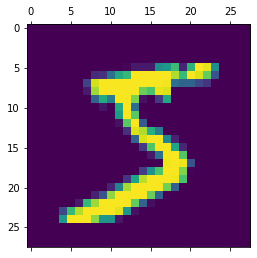

In [3]:
plt.matshow(x_train[0])

In [4]:
print(y_train[0])

5


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#Scaling
x_train = x_train / 255
x_test = x_test / 255

In [7]:
#Flattening x_train and x_test
#28*28 because the array is 28 by 28
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_train_flattened.shape)

(60000, 784)


In [8]:
#Creation of the Artificial Network
#10 is the number of outputs, basically the values inside y_train (0-9)
#input_shape = 784 -> the shape of x_train, from 28*28 -> 784 (flattened)


model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid' )
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 829us/step - loss: 0.4675 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 806us/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.2734 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.2666 - accuracy: 0.9259


In [9]:
#Evaluating using test set
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 631us/step - loss: 0.2676 - accuracy: 0.9257


[0.2675684988498688, 0.9257000088691711]

In [16]:
y_pred = model.predict(x_test_flattened)

array([2.3249120e-02, 2.7832968e-07, 5.2588552e-02, 9.4604218e-01,
       1.6296804e-03, 8.8476509e-02, 1.4601956e-06, 9.9982798e-01,
       1.1693406e-01, 6.5701103e-01], dtype=float32)

In [29]:
#y_pred is an array of the prediction, probability that this element is this number
#example y_pred[0],  1st elemet -> 0.023, 
#meaning that y_pred[0] has a 0.023 chance that is number 0 (represents 1st element)

np.set_printoptions(precision = 4, suppress = True)
print(y_pred[0])

[0.0232 0.     0.0526 0.946  0.0016 0.0885 0.     0.9998 0.1169 0.657 ]


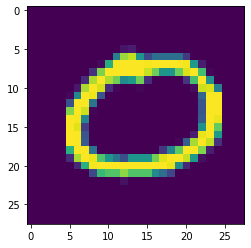

In [31]:
plt.imshow(x_test[69])

In [32]:
#7th element has the highest probability
np.argmax(y_pred[69]) 

0

In [34]:
#convert y_pred into labels first
y_pred_labels = [np.argmax(i) for i in y_pred]

In [35]:
#Confusion Matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

In [36]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    6,    3,    2,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    7,  926,   13,    6,    5,   12,   10,   41,    5],
       [   3,    0,   20,  910,    0,   28,    2,   13,   27,    7],
       [   2,    1,    4,    1,  906,    0,    9,    6,   10,   43],
       [   9,    2,    5,   30,    6,  779,   11,   10,   33,    7],
       [  11,    3,    7,    0,    7,   20,  903,    2,    5,    0],
       [   2,    5,   21,    4,    2,    0,    0,  962,    3,   29],
       [   6,    5,    6,   16,    9,   22,    8,   13,  884,    5],
       [  10,    5,    1,   10,   20,    7,    0,   26,   10,  920]])>

Text(69.0, 0.5, 'Actual')

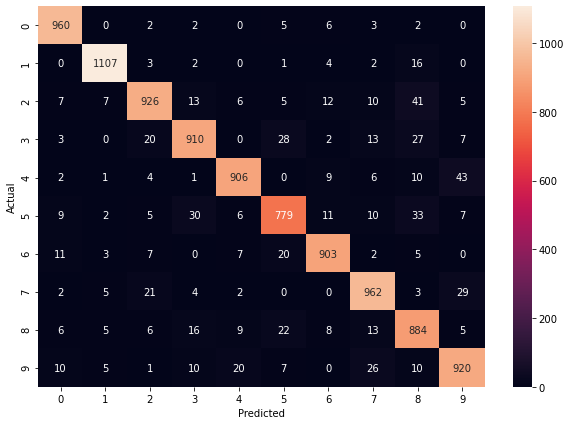

In [38]:
#better visuals for the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [42]:
#New Model with a hidden layer
#Flatten(input_shape = (28,28)) 28,28 is the shape of x_train
# 100 neurons used, less than the input shape
#2nd layer (output layer) dont need input_shape


model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1235 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0631 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0495 - accuracy: 0.9850


In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 719us/step - loss: 0.0799 - accuracy: 0.9756


[0.07989963889122009, 0.975600004196167]